# Imports

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd

# Constants

In [2]:
DATA_FILEPATH = Path.cwd() / ".." / "data.csv"

---

# Reading the data

Let's fill all NaN values with 0 (_under the naïve assumption that the lack of data means absence of cases_).

In [3]:
df = pd.read_csv(DATA_FILEPATH, parse_dates=[0], infer_datetime_format=True)

## find day zero

In [4]:
# date for the first confirmed case
first_case = df["data"][df.confirmados != 0].min()

# drop everything else
df = df[df.data >= first_case].reset_index(drop=True)

## Fit confirmed cases to and exponential growth

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(+b * x) + c

In [6]:
DAYS_TO_FIT = len(df)

In [7]:
x = np.linspace(0, DAYS_TO_FIT - 1, DAYS_TO_FIT)
y = df.confirmados.fillna(0)

# compute exponential params
popt, pcov = curve_fit(func, x, y)

## predict cases

In [8]:
DAYS_TO_PREDICT = 5

In [9]:

x_pred = np.linspace(x.max(), x.max() + DAYS_TO_PREDICT - 1, DAYS_TO_PREDICT)
y_pred = func(x_pred, *popt)

In [10]:
from datetime import timedelta

def generate_xticks_days(first_case, days_to_generate, step=4):
    """
    Computes readable xtick names 
    """

    idx = []
    name = []
    for i in range(days_to_generate):

        data = first_case + timedelta(days=i)

        idx.append(i)
        name.append(f"{data.day_name()}, {data.day}, {data.month_name()}")

    return idx[::step], name[::step]

<Figure size 792x432 with 0 Axes>

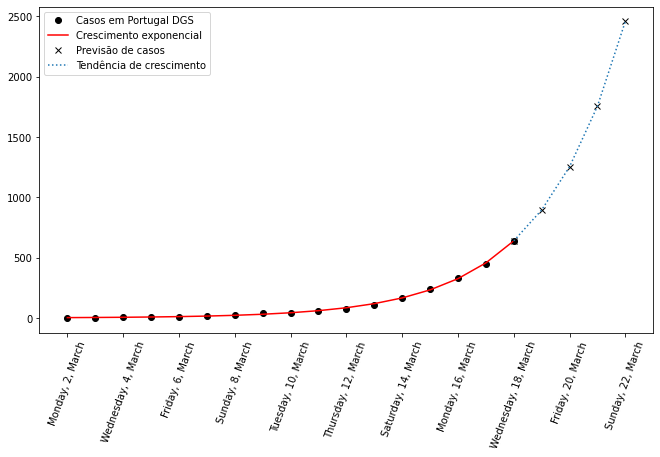

In [11]:
plt.rcParams['figure.figsize'] = [11, 6]

# plot current evolution and current fit
plt.figure()
plt.figure()
plt.plot(x, y, "ko", label="Casos em Portugal DGS")
plt.plot(x, func(x, *popt), "r-", label="Crescimento exponencial")

# plot predictions
plt.plot(x_pred, y_pred, "kx", label="Previsão de casos")
plt.plot(
    x_pred, func(x_pred, *popt), linestyle="dotted", label="Tendência de crescimento"
)

idx, names = generate_xticks_days(first_case, len(x) + DAYS_TO_PREDICT, 2)
plt.xticks(idx, names, rotation=70)

plt.legend()

#plt.savefig('pred.png')